In [2]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('train_values.csv')
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [5]:
df2 = pd.read_csv('train_labels.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


In [6]:
df['land_surface_condition'] = df['land_surface_condition'].astype('category')
df['legal_ownership_status'] = df['legal_ownership_status'].astype('category')
df['land_surface_condition'] = df['land_surface_condition'].astype('category')
df['foundation_type'] = df['foundation_type'].astype('category')
df['roof_type'] = df['roof_type'].astype('category')
df['ground_floor_type'] = df['ground_floor_type'].astype('category')
df['other_floor_type'] = df['other_floor_type'].astype('category')
df['position'] = df['position'].astype('category')
df['plan_configuration'] = df['plan_configuration'].astype('category')

In [7]:
df['has_secondary_use'] = df['has_secondary_use'].astype('bool')
df['has_secondary_use_agriculture'] = df['has_secondary_use_agriculture'].astype('bool')
df['has_secondary_use_hotel'] = df['has_secondary_use_hotel'].astype('bool')
df['has_secondary_use_rental'] = df['has_secondary_use_rental'].astype('bool')
df['has_secondary_use_institution'] = df['has_secondary_use_institution'].astype('bool')
df['has_secondary_use_school'] = df['has_secondary_use_school'].astype('bool')
df['has_secondary_use_industry'] = df['has_secondary_use_industry'].astype('bool')
df['has_secondary_use_health_post'] = df['has_secondary_use_health_post'].astype('bool')
df['has_secondary_use_gov_office'] = df['has_secondary_use_gov_office'].astype('bool')
df['has_secondary_use_use_police'] = df['has_secondary_use_use_police'].astype('bool')
df['has_secondary_use_other'] = df['has_secondary_use_other'].astype('bool')

df['has_superstructure_adobe_mud'] = df['has_superstructure_adobe_mud'].astype('bool')
df['has_superstructure_mud_mortar_stone'] = df['has_superstructure_mud_mortar_stone'].astype('bool')
df['has_superstructure_stone_flag'] = df['has_superstructure_stone_flag'].astype('bool')
df['has_superstructure_cement_mortar_stone'] = df['has_superstructure_cement_mortar_stone'].astype('bool')
df['has_superstructure_mud_mortar_brick'] = df['has_superstructure_mud_mortar_brick'].astype('bool')

df['has_superstructure_cement_mortar_brick'] = df['has_superstructure_cement_mortar_brick'].astype('bool')
df['has_superstructure_timber'] = df['has_superstructure_timber'].astype('bool')
df['has_superstructure_bamboo'] = df['has_superstructure_bamboo'].astype('bool')
df['has_superstructure_rc_non_engineered'] = df['has_superstructure_rc_non_engineered'].astype('bool')
df['has_superstructure_rc_engineered'] = df['has_superstructure_rc_engineered'].astype('bool')
df['has_superstructure_other'] = df['has_superstructure_other'].astype('bool')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int64   
 1   geo_level_1_id                          260601 non-null  int64   
 2   geo_level_2_id                          260601 non-null  int64   
 3   geo_level_3_id                          260601 non-null  int64   
 4   count_floors_pre_eq                     260601 non-null  int64   
 5   age                                     260601 non-null  int64   
 6   area_percentage                         260601 non-null  int64   
 7   height_percentage                       260601 non-null  int64   
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

In [9]:
df = df.merge(df2)
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,False,False,False,False,False,False,False,False,False,3
1,28830,8,900,2812,2,10,8,7,o,r,...,False,False,False,False,False,False,False,False,False,2
2,94947,21,363,8973,2,10,5,5,t,r,...,False,False,False,False,False,False,False,False,False,3
3,590882,22,418,10694,2,10,6,5,t,r,...,False,False,False,False,False,False,False,False,False,2
4,201944,11,131,1488,3,30,8,9,t,r,...,False,False,False,False,False,False,False,False,False,3


In [10]:
df.to_csv('dataset_v1')

In [34]:
print(df.shape)

(260601, 41)


El df unificado tiene 260601 filas y 41 columnas

### ¿Existe relacion entre la antiguedad de las edificaciones y el nivel de daños registrado a causa del terremoto?

Hipótesis: "Es probable que a mayor antiguedad, por el desgaste de los materiales con el tiempo, y el menor avance del desarrollo tecnológico en las construcciones, se evidencien mayores niveles de daño"

In [36]:
df['age'].value_counts()

10     38896
15     36010
5      33697
20     32182
0      26041
25     24366
30     18028
35     10710
40     10559
50      7257
45      4711
60      3612
80      3055
55      2033
70      1975
995     1390
100     1364
65      1123
90      1085
85       847
75       512
95       414
120      180
150      142
200      106
110      100
105       89
125       37
115       21
140        9
130        9
180        7
160        6
170        6
175        5
135        5
145        3
190        3
195        2
165        2
155        1
185        1
Name: age, dtype: int64

In [38]:
less_30=df['age']<=30
less_30

0          True
1          True
2          True
3          True
4          True
          ...  
260596    False
260597     True
260598    False
260599     True
260600     True
Name: age, Length: 260601, dtype: bool

In [41]:
less_30.sum()/260601

0.8028365201975434

Podemos observar que del total de edificaciones censadas, sobre un 80% tiene 30 años o menos

Text(0.5, 0, 'nivel de daño')

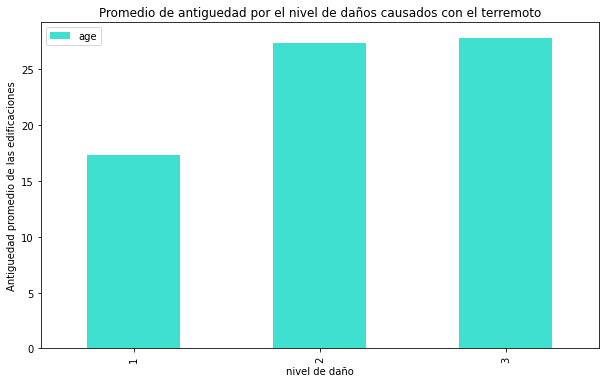

In [12]:
grouped_age=df.groupby(['damage_grade']).agg({'age':'mean'}).plot(kind='bar', title='Promedio de antiguedad por el nivel de daños causados con el terremoto', linewidth=2, figsize=(10,6), color='turquoise');
ax=plt.gca()
ax.set_ylabel('Antiguedad promedio de las edificaciones');
ax.set_xlabel('nivel de daño')

Las edificaciones con menor nivel de daños, tienen en promedio alrededor de 17 años de antigüedad, y efectivamente para los edificios con mayores daños hay un promedio mayor de años de antiguedad. Sin embargo no se observa demasiada diferencia en años entre las edificaciones con daños medios y las con daños graves. Esto puede dar cuenta de otros factores, más allá de la edad interviniendo.

In [48]:
grouped_age_tabla=df.groupby(['damage_grade']).agg({'age':'mean'})
grouped_age_tabla

,age
damage_grade,
1,17.320490
2,27.342118
3,27.817423


In [54]:
df['unos']=1

0         1
1         1
2         1
3         1
4         1
         ..
260596    1
260597    1
260598    1
260599    1
260600    1
Name: unos, Length: 260601, dtype: int64

In [55]:
conteo = df[['age','damage_grade','unos']].pivot_table(values='unos', columns='damage_grade',index='age',aggfunc=np.sum)
conteo

damage_grade,1,2,3
age,,,
0,7213.0,12721.0,6107.0
5,5590.0,19030.0,9077.0
10,4360.0,22370.0,12166.0
15,2878.0,20767.0,12365.0
20,1954.0,18603.0,11625.0
25,1131.0,14073.0,9162.0
30,640.0,10444.0,6944.0
35,352.0,6246.0,4112.0
40,283.0,6088.0,4188.0


Text(0.5, 0, 'Antiguedad de la edificacion')

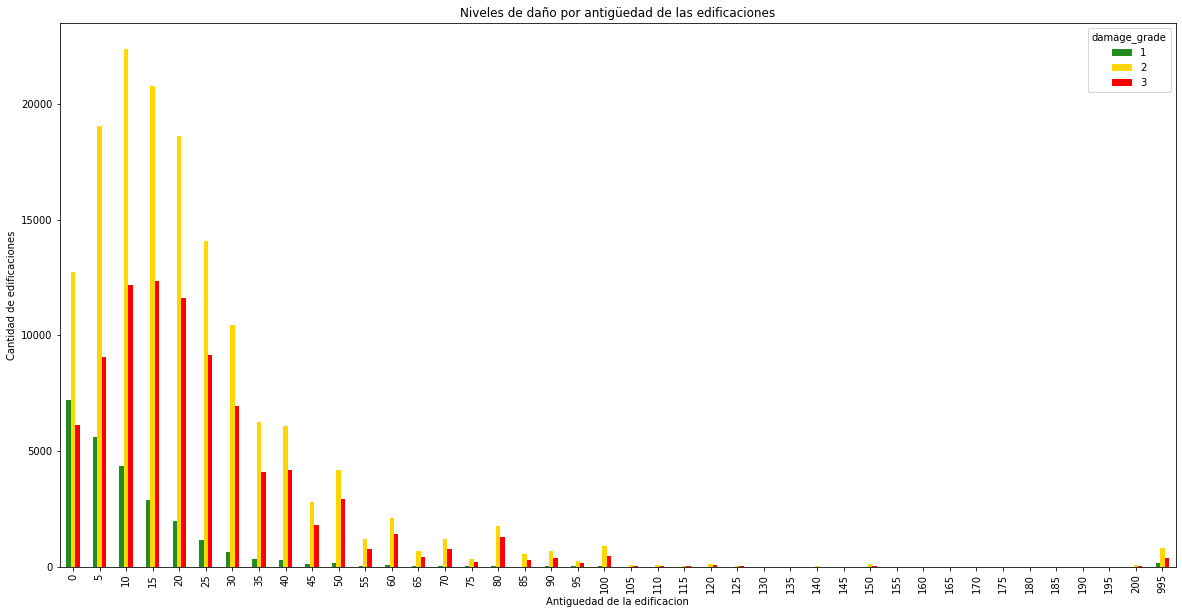

In [67]:
age_grupos=conteo.plot(kind='bar', title='Niveles de daño por antigüedad de las edificaciones', linewidth=2, figsize=(20,10), color=['forestgreen','gold','red']);
ax=plt.gca()
ax.set_ylabel('Cantidad de edificaciones');
ax.set_xlabel('Antiguedad de la edificacion')

A continuacion creo una nueva columna para el data frame, consistente en la variable de interés, restandole 1 a cada valor. Asi daño leve será 0, daño medio será 1 y daño grave será 0

In [43]:
a = df.loc[df['damage_grade']==1].groupby('age').agg({'damage_grade':'count'}).rename(columns={'damage_grade': 'Damage grade 1'})
b = df.loc[df['damage_grade']==2].groupby('age').agg({'damage_grade':'count'}).rename(columns={'damage_grade': 'Damage grade 2'})
c = df.loc[df['damage_grade']==3].groupby('age').agg({'damage_grade':'count'}).rename(columns={'damage_grade': 'Damage grade 3'})


In [13]:
df['damage_grade_b']=df['damage_grade']-1
df['damage_grade_b'].describe()

count    260601.000000
mean          1.238272
std           0.611814
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: damage_grade_b, dtype: float64

Text(0.5, 0, 'Antiguedad en años de la construccion')

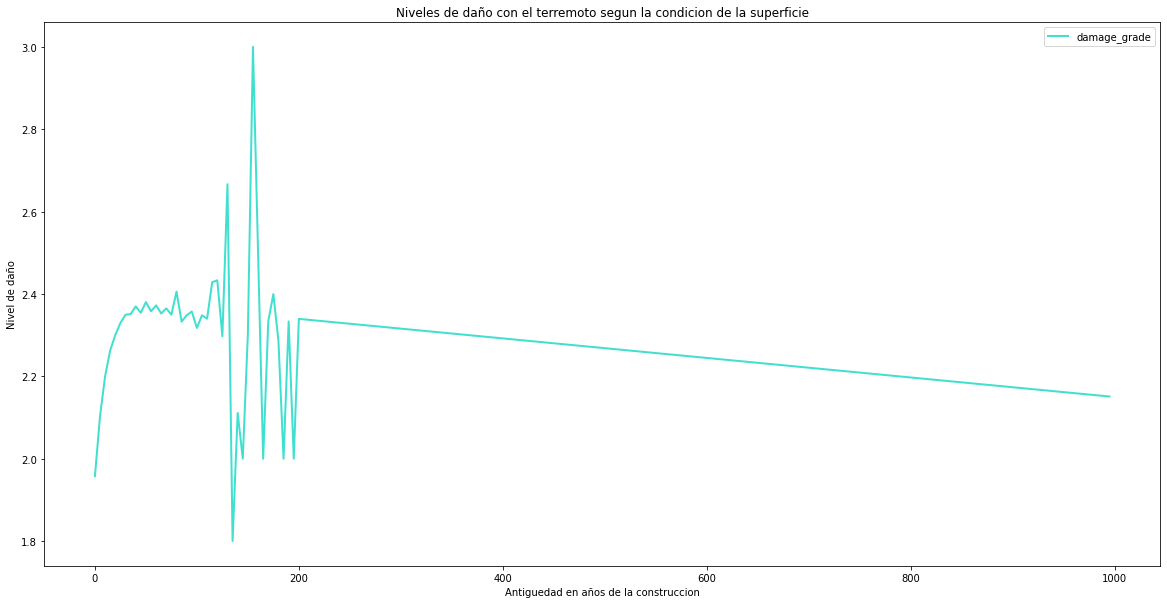

In [14]:
grouped_age=df.groupby(['age']).agg({'damage_grade':'mean'}).plot(kind='line', title='Niveles de daño con el terremoto segun la condicion de la superficie', linewidth=2, figsize=(20,10), color='turquoise');
ax=plt.gca()
ax.set_ylabel('Nivel de daño');
ax.set_xlabel('Antiguedad en años de la construccion')

Text(0.5, 0, 'Antiguedad en años de la construccion')

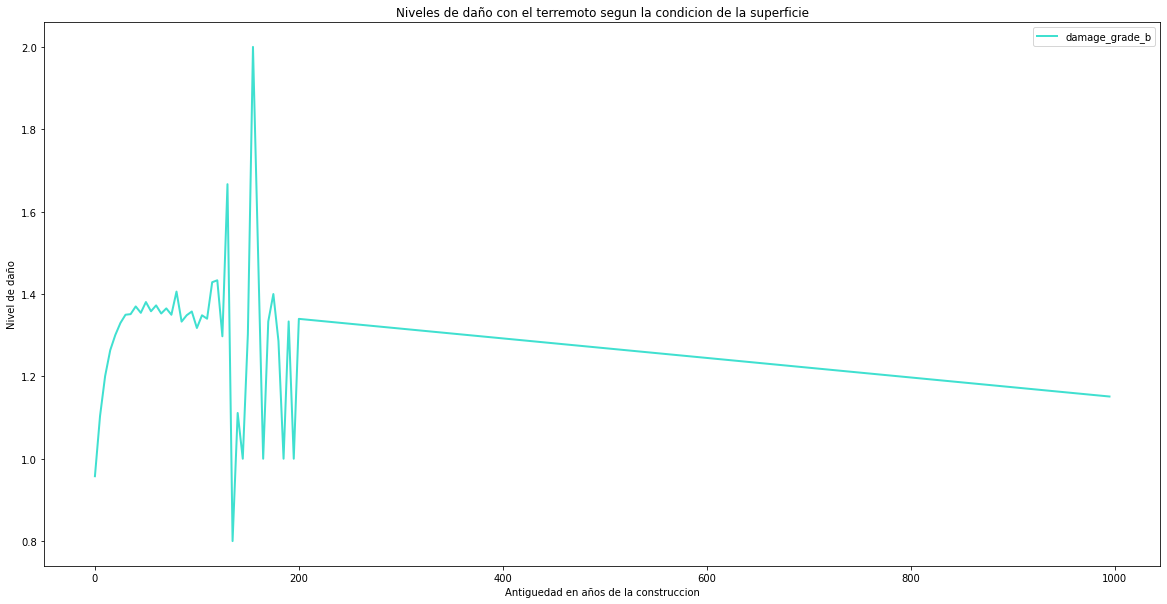

In [15]:
grouped_age=df.groupby(['age']).agg({'damage_grade_b':'mean'}).plot(kind='line', title='Niveles de daño con el terremoto segun la condicion de la superficie', linewidth=2, figsize=(20,10), color='turquoise');
ax=plt.gca()
ax.set_ylabel('Nivel de daño');
ax.set_xlabel('Antiguedad en años de la construccion')

Aparentemente los edificios muy nuevos son los que tuvieron menor grado de daño. El Nivel de daño aumenta de manera continua hasta los primeros 40 años de antiguedad aproximadamente, luego se experimenta un descenso irregular del grado de daño, pero pasando los 100 años se producen tendencias muy radicales y distintas en cuanto a las consecuencias que dejó el sismo, por lo cual no aventuraría una interpretación al respecto.

In [16]:
df_entero=df[['geo_level_1_id','geo_level_2_id','geo_level_3_id','count_floors_pre_eq','height_percentage','area_percentage','count_families','age']]
df_entero

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,height_percentage,area_percentage,count_families,age
0,6,487,12198,2,5,6,1,30
1,8,900,2812,2,7,8,1,10
2,21,363,8973,2,5,5,1,10
3,22,418,10694,2,5,6,1,10
4,11,131,1488,3,9,8,1,30
...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,3,6,1,55
260597,17,715,2060,2,5,6,1,0
260598,17,51,8163,3,7,6,1,55
260599,26,39,1851,2,6,14,1,10


In [17]:
df_entero['height_percentage'].describe()

count    260601.000000
mean          5.434365
std           1.918418
min           2.000000
25%           4.000000
50%           5.000000
75%           6.000000
max          32.000000
Name: height_percentage, dtype: float64

In [18]:
df_entero['area_percentage'].describe()

count    260601.000000
mean          8.018051
std           4.392231
min           1.000000
25%           5.000000
50%           7.000000
75%           9.000000
max         100.000000
Name: area_percentage, dtype: float64

In [19]:
df_int_escalado_simple=pd.DataFrame()

In [20]:
df_int_escalado_simple['count_floors_pre_eq']=df_entero['count_floors_pre_eq']/df_entero['count_floors_pre_eq'].max()
df_int_escalado_simple['height_percentage']=df_entero['height_percentage']/df_entero['height_percentage'].max()
df_int_escalado_simple['area_percentage']=df_entero['area_percentage']/100
df_int_escalado_simple['count_families']=df_entero['count_families']/df_entero['count_families'].max()
df_int_escalado_simple['age']=df_entero['age']/df_entero['age'].max()
df_int_escalado_simple

,count_floors_pre_eq,height_percentage,area_percentage,count_families,age
0,0.222222,0.15625,0.06,0.111111,0.030151
1,0.222222,0.21875,0.08,0.111111,0.010050
2,0.222222,0.15625,0.05,0.111111,0.010050
3,0.222222,0.15625,0.06,0.111111,0.010050
4,0.333333,0.28125,0.08,0.111111,0.030151
...,...,...,...,...,...
260596,0.111111,0.09375,0.06,0.111111,0.055276
260597,0.222222,0.15625,0.06,0.111111,0.000000
260598,0.333333,0.21875,0.06,0.111111,0.055276
260599,0.222222,0.18750,0.14,0.111111,0.010050


c:\users\patricio\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


Text(0.5, 1.0, 'Análsis de correlación de los datos numéricos')

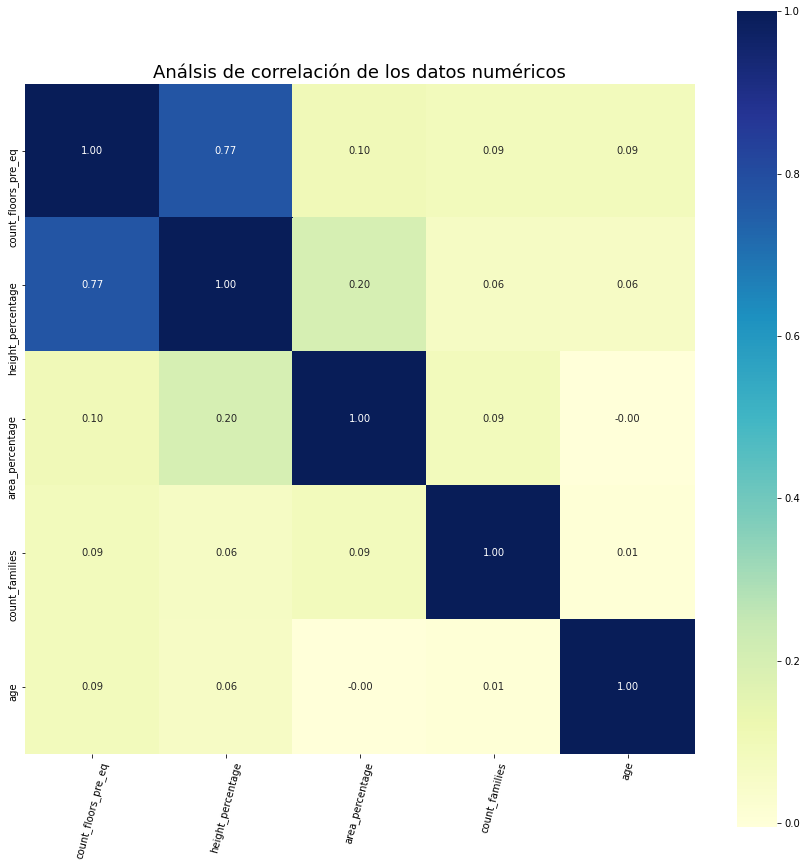

In [21]:
plt.figure(figsize=(15, 15))
titulo='Análsis de correlación de los datos numéricos'

sns.heatmap(df_int_escalado_simple.corr(), square=True, annot=True, fmt='.2f', cmap="YlGnBu");
plt.xticks(rotation=75)
plt.title(titulo,fontSize=18)


In [22]:
df_int_minimo_maximo=pd.DataFrame()

In [23]:
df_int_minimo_maximo['count_floors_pre_eq']=(df_entero['count_floors_pre_eq']-df_entero['count_floors_pre_eq'].min())/(df_entero['count_floors_pre_eq'].max()-df_entero['count_floors_pre_eq'].min())
df_int_minimo_maximo['height_percentage']=(df_entero['height_percentage']-df_entero['height_percentage'].min())/(df_entero['height_percentage'].max()-df_entero['height_percentage'].min())
df_int_minimo_maximo['area_percentage']=(df_entero['area_percentage']-df_entero['area_percentage'].min())/(df_entero['area_percentage'].max()-df_entero['area_percentage'].min())
df_int_minimo_maximo['count_families']=(df_entero['count_families']-df_entero['count_families'].min())/(df_entero['count_families'].max()-df_entero['count_families'].min())
df_int_minimo_maximo['age']=(df_entero['age']-df_entero['age'].min())/(df_entero['age'].max()-df_entero['age'].min())
df_int_minimo_maximo

,count_floors_pre_eq,height_percentage,area_percentage,count_families,age
0,0.125,0.100000,0.050505,0.111111,0.030151
1,0.125,0.166667,0.070707,0.111111,0.010050
2,0.125,0.100000,0.040404,0.111111,0.010050
3,0.125,0.100000,0.050505,0.111111,0.010050
4,0.250,0.233333,0.070707,0.111111,0.030151
...,...,...,...,...,...
260596,0.000,0.033333,0.050505,0.111111,0.055276
260597,0.125,0.100000,0.050505,0.111111,0.000000
260598,0.250,0.166667,0.050505,0.111111,0.055276
260599,0.125,0.133333,0.131313,0.111111,0.010050


c:\users\patricio\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


Text(0.5, 1.0, 'Análsis de correlación de los datos numéricos')

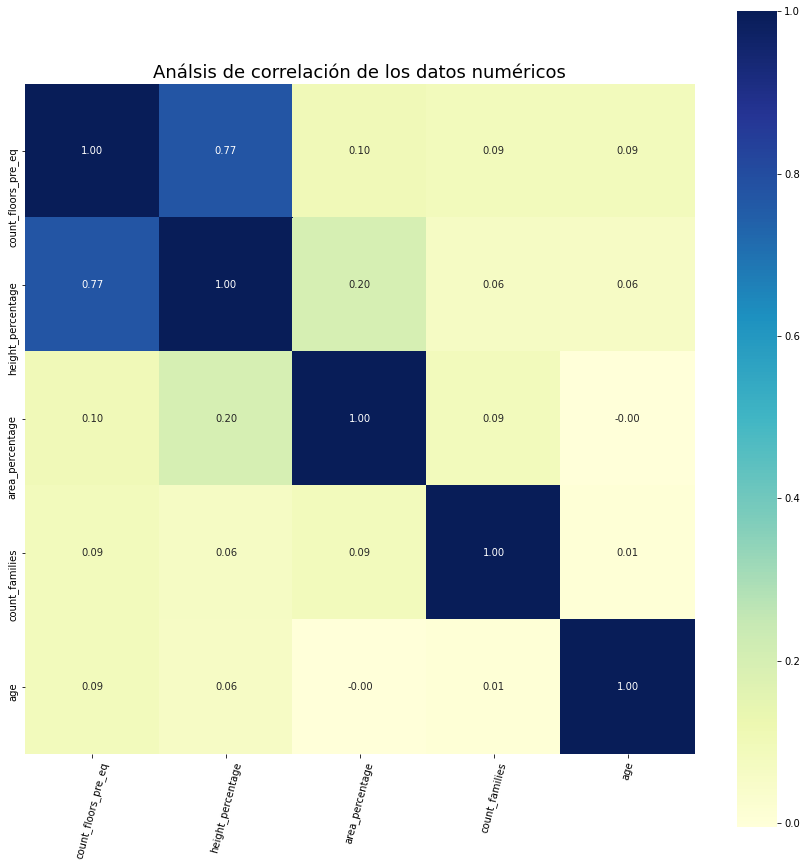

In [24]:
plt.figure(figsize=(15, 15))
titulo='Análsis de correlación de los datos numéricos'

sns.heatmap(df_int_minimo_maximo.corr(), square=True, annot=True, fmt='.2f', cmap="YlGnBu");
plt.xticks(rotation=75)
plt.title(titulo,fontSize=18)


In [25]:
df_int_z_score=pd.DataFrame()

In [26]:
df_int_z_score['count_floors_pre_eq']=(df_entero['count_floors_pre_eq']-df_entero['count_floors_pre_eq'].mean())/df_entero['count_floors_pre_eq'].std()
df_int_z_score['height_percentage']=(df_entero['height_percentage']-df_entero['height_percentage'].mean())/df_entero['height_percentage'].std()
df_int_z_score['area_percentage']=(df_entero['area_percentage']-df_entero['area_percentage'].mean())/df_entero['area_percentage'].std()
df_int_z_score['count_families']=(df_entero['count_families']-df_entero['count_families'].mean())/df_entero['count_families'].std()
df_int_z_score['age']=(df_entero['age']-df_entero['age'].mean())/df_entero['age'].std()
df_int_z_score

,count_floors_pre_eq,height_percentage,area_percentage,count_families,age
0,-0.178273,-0.226418,-0.459459,0.038365,0.047100
1,-0.178273,0.816107,-0.004110,0.038365,-0.224765
2,-0.178273,-0.226418,-0.687134,0.038365,-0.224765
3,-0.178273,-0.226418,-0.459459,0.038365,-0.224765
4,1.195986,1.858633,-0.004110,0.038365,0.047100
...,...,...,...,...,...
260596,-1.552533,-1.268944,-0.459459,0.038365,0.386931
260597,-0.178273,-0.226418,-0.459459,0.038365,-0.360697
260598,1.195986,0.816107,-0.459459,0.038365,0.386931
260599,-0.178273,0.294844,1.361939,0.038365,-0.224765


c:\users\patricio\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


Text(0.5, 1.0, 'Análsis de correlación de los datos numéricos')

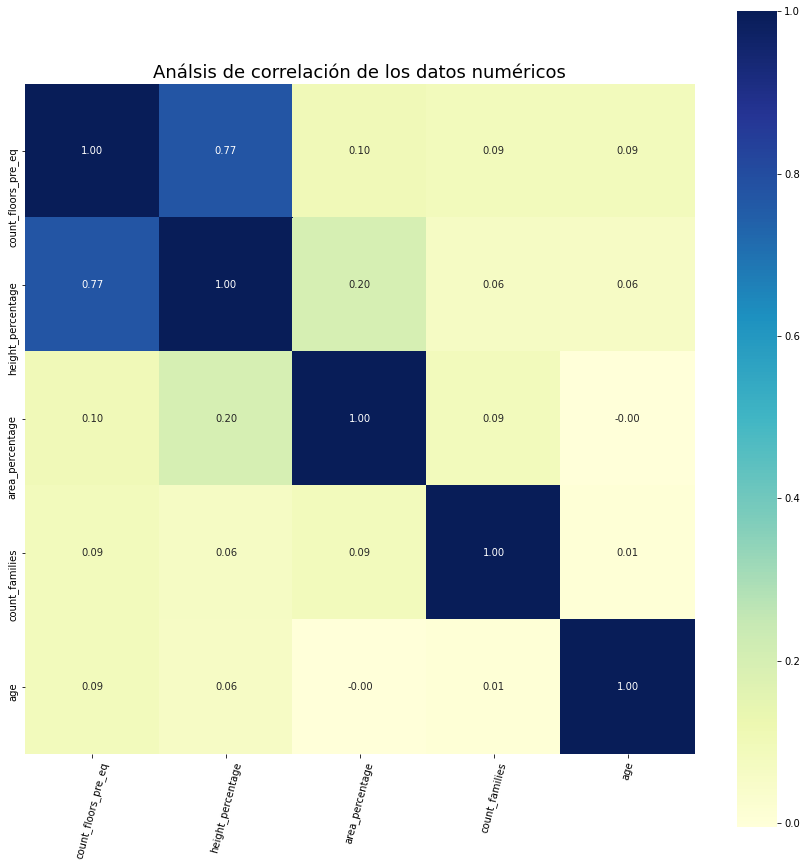

In [27]:
plt.figure(figsize=(15, 15))
titulo='Análsis de correlación de los datos numéricos'

sns.heatmap(df_int_z_score.corr(), square=True, annot=True, fmt='.2f', cmap="YlGnBu");
plt.xticks(rotation=75)
plt.title(titulo,fontSize=18)

### ¿Habrá ciertos tipos de condiciones de la superficie terrestre en que los edificios fueron construidos, asociadas a los niveles de daño registrados en estos?

Hipótesis: “Parece razonable que distintas condiciones en el suelo de la edificación haya contribuido a resistir mejor o peor a la catástrofe”

Text(0.5, 0, 'Condicion de la superficie de la construccion')

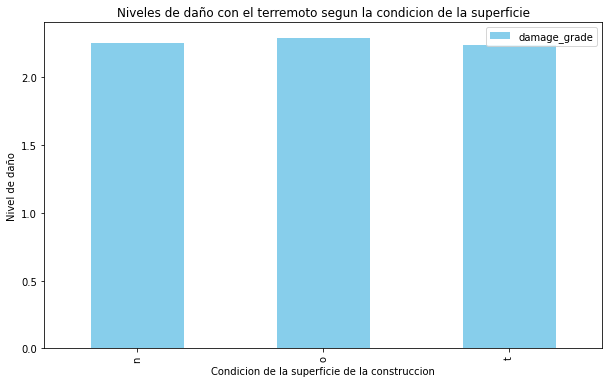

In [28]:
grouped_age=df.groupby(['land_surface_condition']).agg({'damage_grade':'mean'}).plot(kind='bar', title='Niveles de daño con el terremoto segun la condicion de la superficie', linewidth=2, figsize=(10,6), color='skyblue');
ax=plt.gca()
ax.set_ylabel('Nivel de daño');
ax.set_xlabel('Condicion de la superficie de la construccion')

Text(0.5, 0, 'Condicion de la superficie de la construccion')

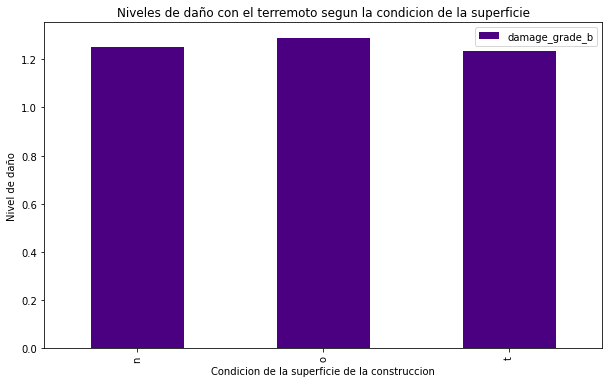

In [29]:
grouped_age=df.groupby(['land_surface_condition']).agg({'damage_grade_b':'mean'}).plot(kind='bar', title='Niveles de daño con el terremoto segun la condicion de la superficie', linewidth=2, figsize=(10,6), color='indigo');
ax=plt.gca()
ax.set_ylabel('Nivel de daño');
ax.set_xlabel('Condicion de la superficie de la construccion')

Text(0.5, 0, 'Nivel de daño')

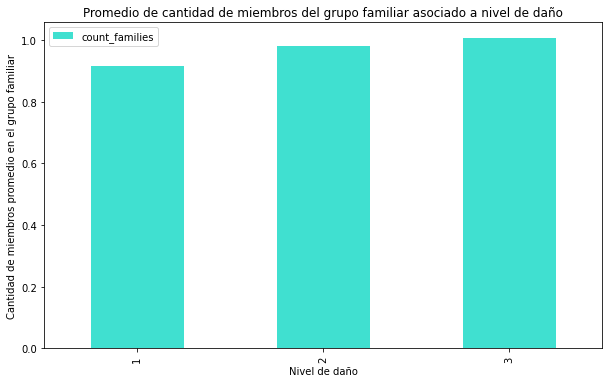

In [30]:
grouped_count_families=df.groupby(['damage_grade']).agg({'count_families':'mean'}).plot(kind='bar', title='Promedio de cantidad de miembros del grupo familiar asociado a nivel de daño', linewidth=2, figsize=(10,6), color='turquoise');
ax=plt.gca()
ax.set_ylabel('Cantidad de miembros promedio en el grupo familiar');
ax.set_xlabel('Nivel de daño')

In [31]:
df['count_families'].value_counts()

1    226115
0     20862
2     11294
3      1802
4       389
5       104
6        22
7         7
9         4
8         2
Name: count_families, dtype: int64

Text(0.5, 0, 'Nivel de daño')

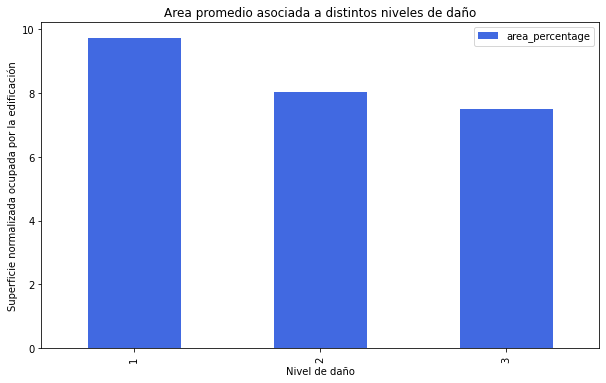

In [32]:
grouped_count_families=df.groupby(['damage_grade']).agg({'area_percentage':'mean'}).plot(kind='bar', title='Area promedio asociada a distintos niveles de daño', linewidth=2, figsize=(10,6), color='royalblue');
ax=plt.gca()
ax.set_ylabel('Superficie normalizada ocupada por la edificación');
ax.set_xlabel('Nivel de daño')

Existe una relacion inversa, no tan marcada entre area y gravedad de daños con el terremoto. Los niveles mas leves de daño están asociados con areas más amplias, y a la inversa los niveles más graves de daño se asocian a areas en promedio más reducidas.